# <img style="float: left; padding-right: 20px; width: 100px" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/1920px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png"> IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Semestre 2021-1**<br>
**Profesora:** Paula Aguirre <br>

----

 <h1><center>Tarea 2: Extracción de Datos desde la Web </center></h1>
    
## Instrucciones Generales.

- Fecha de entrega: 30 de septiembre de 2021, 23:59.

- Vía de entrega: GitHub

- Esta Tarea debe desarrollarse de manera totalmente *individual*, de acuerdo a lo establecido en la sección de Integridad Académica en el programa del curso.

- La Tarea debe ser desarrollada en lenguaje de programación Python y en formato Jupyter Notebook.

- El desarrollo del Notebook debe ser claro y ordenado, incluyendo anotaciones (markdown) y comentarios que permitan seguir fácilmente el código y los pasos implementados, y siguiendo buenas prácticas de programación. La presentación y claridad del notebook y código forman parte de la evaluación de la tarea.

- Se sugiere hacer consultas y comentarios sobre la Tarea a traves del Foro del curso en Canvas.


## Objetivos de Aprendizaje

Esta Tarea tiene como objetivo poner en práctica los contenidos del curso vistos hasta ahora, en especial:
- Manejo de librerías `pandas`,`matplotlib`, `requests` y `BeautifulSoup`.
- Manejo de datos estructurado y semi-estructurados.
- Análisis y comprensión de los elementos fundamentales de APIs y códigos HTML de páginas web. 
- Extracción de datos de la via API y scrapping sencillo.

---------

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

## 1. Reporte de indicadores económicos de Chile.

La API **MindicadorChile** es un servicio open source (web service) que entrega los principales indicadores económicos para Chile en formato JSON. Tanto los indicadores diarios como históricos para que desarrolladores puedan utilizarlos en sus aplicaciones o sitios web.

La aplicación mapea constantemente el sitio del Banco Central de Chile manteniendo así nuestra base de datos actualizada con los últimos valores del día. Toda la documentación de la API está disponible en la dirección https://mindicador.cl/.

En este ejercicio, ud. deberá utilizar la API para compilar datos para un análisis de la evolución de la economía chilena en los años 2019, 2020 y 2021, de manera de evaluar el impacto del estallido social y la pandemia.

**Revise cuisadosamente la página y documentación de la API**, y luego desarrolle los siguientes problemas:

**1.1.** Use la API para obtener los valores de siguientes indicadores entre el 1 de enero de 2019, y el 30 de septiembre de 2021: Dólar observado, tasa de desempleo, libra de cobre, índice de precios al consumidor.


In [2]:
url='https://mindicador.cl/api/{tipo_indicador}/{yyyy}'

indicadores=['dolar','libra_cobre','tasa_desempleo','ipc']

years=[2019,2020,2021]

**1.2.** Para cada indicador, genere un único DataFrame que contenga las siguientes columnas: fecha, valor. El DataFrame debe incluir todos los reportes disponibles para dicho indicador en el rango de fechas indicado, y las fechas deben estar en orden cronológico. Para ello, le pueden ser de utilidad las siguientes funciones de pandas: pd.to_datetime(),DataFrame.sort_values().


In [3]:
frames={}
for ind in indicadores:
    df=pd.DataFrame(columns=['fecha','valor'])
    for year in years:
        url='https://mindicador.cl/api/%s/%s'%(ind,year)
        print(url)
        r=requests.get(url)
        df=df.append(pd.json_normalize(r.json(),record_path='serie'))
    frames[ind]=df

    

https://mindicador.cl/api/dolar/2019
https://mindicador.cl/api/dolar/2020
https://mindicador.cl/api/dolar/2021
https://mindicador.cl/api/libra_cobre/2019
https://mindicador.cl/api/libra_cobre/2020
https://mindicador.cl/api/libra_cobre/2021
https://mindicador.cl/api/tasa_desempleo/2019
https://mindicador.cl/api/tasa_desempleo/2020
https://mindicador.cl/api/tasa_desempleo/2021
https://mindicador.cl/api/ipc/2019
https://mindicador.cl/api/ipc/2020
https://mindicador.cl/api/ipc/2021


**1.3.** Genere una figura con cuatro paneles o subplots. En cada uno de ellos, grafique la serie de tiempo de los indicadores analizados, siguiendo las reglas básicas de formato de gráficos (ejes, títulos, etiquetas, etc.). A continuación se muestra un ejemplo de la figura a generar:

<div>
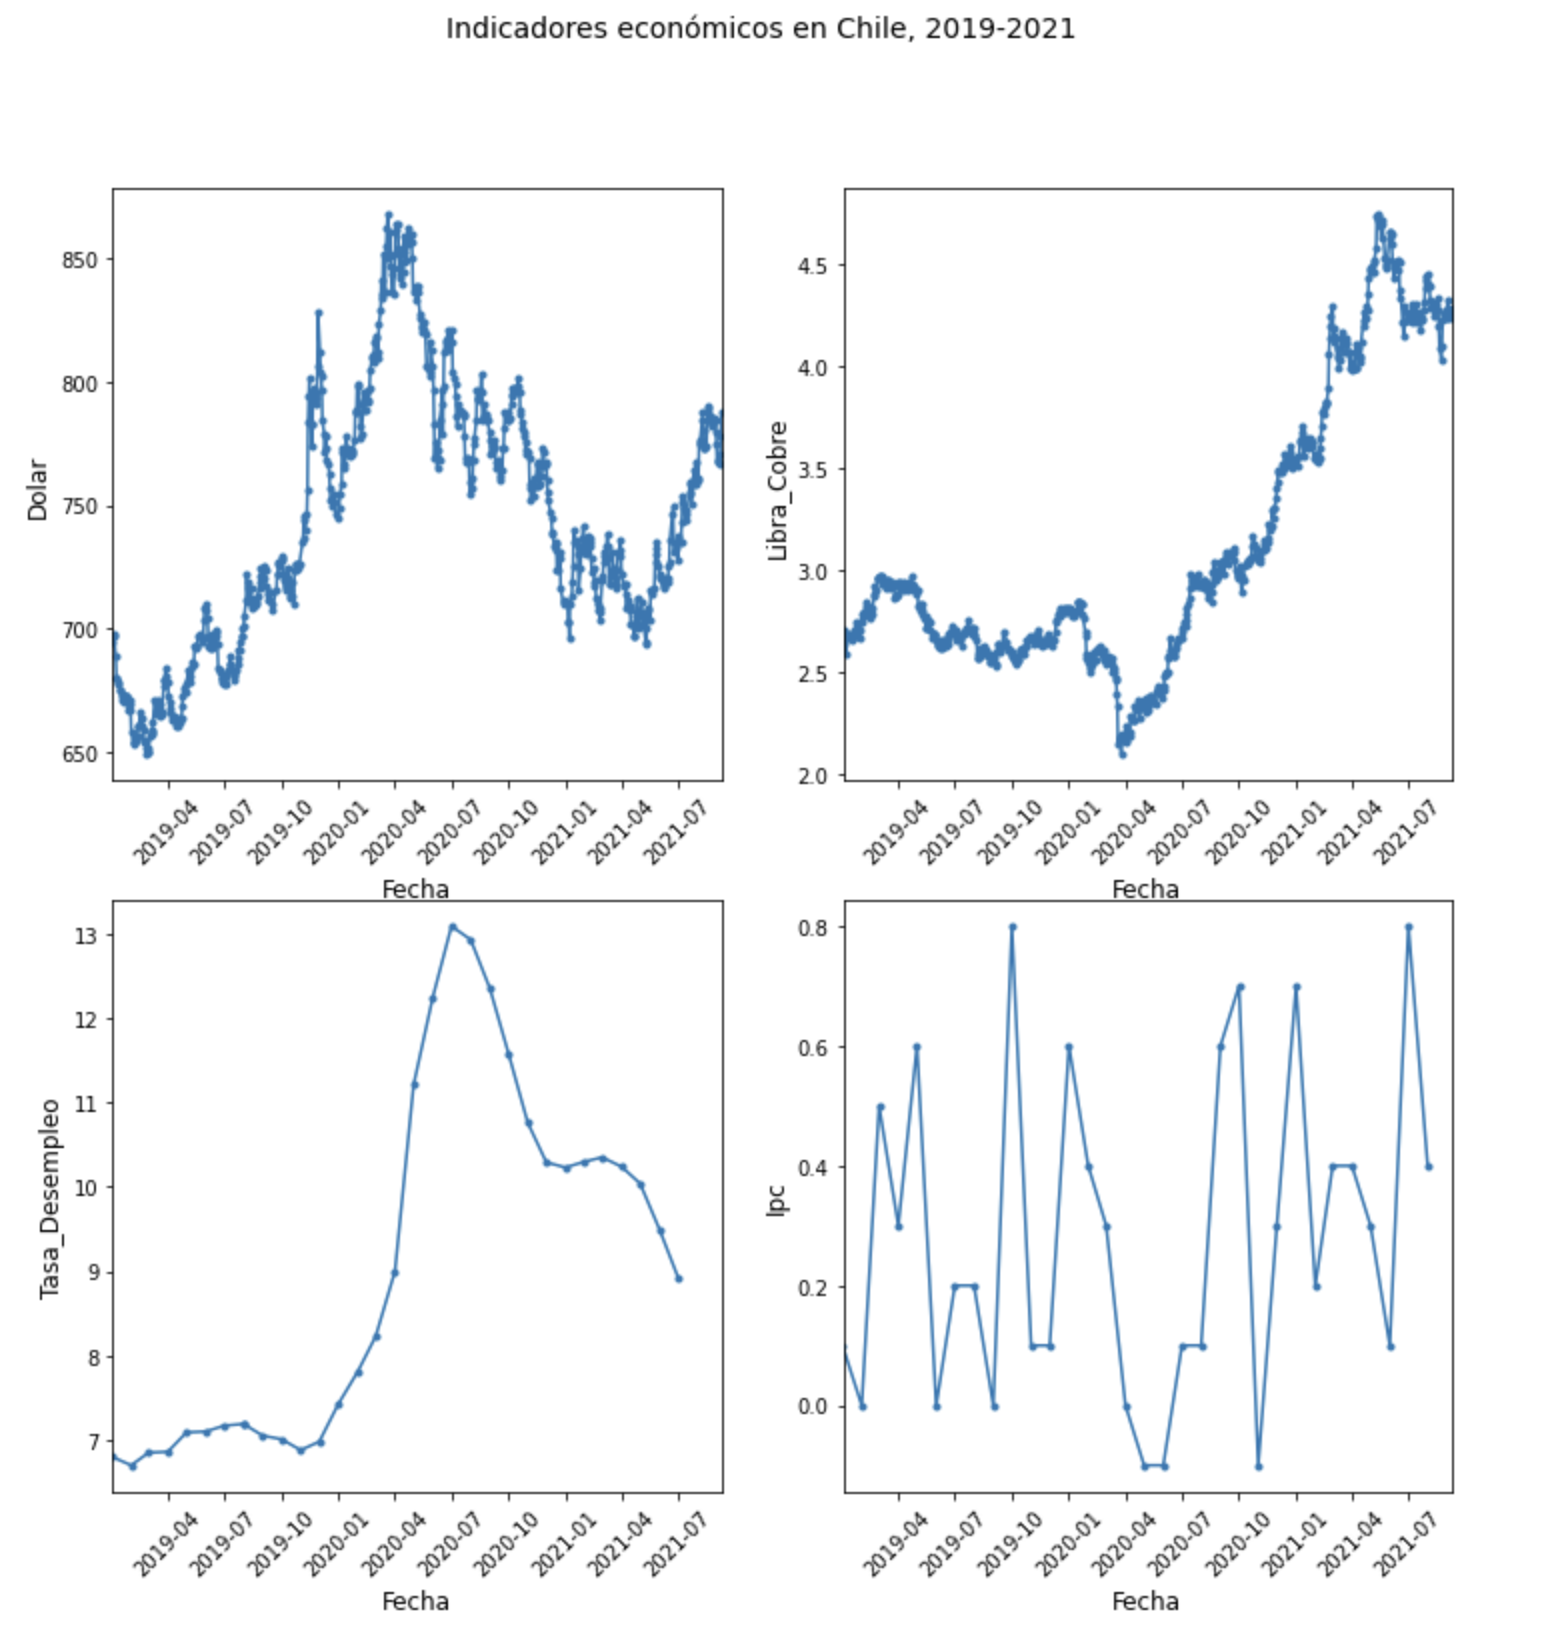
</div>

In [7]:
frames['ipc']

,fecha,valor
0,2019-12-01 03:00:00+00:00,0.1
1,2019-11-01 03:00:00+00:00,0.1
2,2019-10-01 03:00:00+00:00,0.8
3,2019-09-01 04:00:00+00:00,0.0
4,2019-08-01 04:00:00+00:00,0.2
5,2019-07-01 04:00:00+00:00,0.2
6,2019-06-01 04:00:00+00:00,0.0
7,2019-05-01 04:00:00+00:00,0.6
8,2019-04-01 03:00:00+00:00,0.3
9,2019-03-01 03:00:00+00:00,0.5


dolar
libra_cobre
tasa_desempleo
ipc


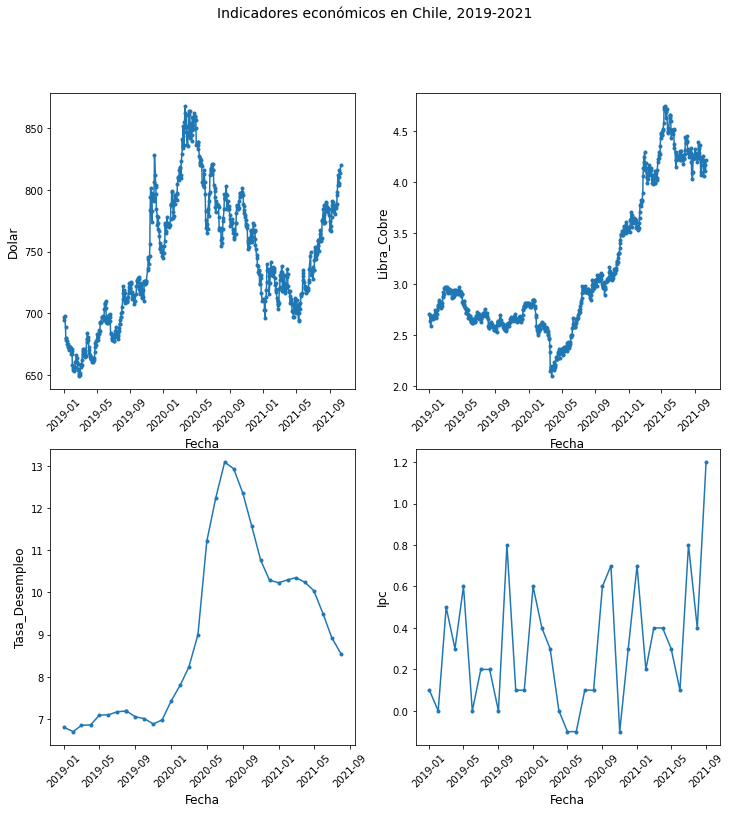

In [9]:
fig=plt.figure(figsize=(12,12))

for n,ind in enumerate(indicadores):
    print(ind)

    ax=fig.add_subplot(2,2,n+1)
    df=frames[ind]
    df['fecha']=pd.to_datetime(df['fecha'])
    df=df.sort_values(by='fecha')
    fecha=df['fecha']
    valor=df['valor']
    ax.plot(fecha,valor,'.-')
    ax.set_ylabel(ind.title(),fontsize=12)
    ax.set_xlabel('Fecha',fontsize=12)
    #ax.set_xlim(frames['dolar'].fecha.min(),frames['dolar'].fecha.max())
    plt.xticks(rotation=45)
fig.suptitle('Indicadores económicos en Chile, 2019-2021',fontsize=14);


## 2. Terremotos alrededor del mundo (USGS)

El Servicio Geológico de los Estados Unidos o USGS por sus siglas en inglés (United States Geological Survey), es una agencia científica del gobierno federal de los Estados Unidos, dedicada al estudio del medio ambiente y ecosistemas, recursos naturales, amenazas del cambio climático y peligros naturales que pueden afectar a las personas. 

El USGS es una institución líder a nivel mundial en sismología, y a través del programa *Earthquake Hazards* (https://earthquake.usgs.gov/) se ocupa de monitorear y reportar eventos sísmicos, evaluar la amenaza e impacto de terremotos, e investigar sobre sus causas y efectos. Dentro de sus múltiples herramientas y plataformas de información, cuenta con una API que entrega información en tiempo real de los sismos registrados alrededor del mundo:

https://earthquake.usgs.gov/fdsnws/event/1/?ref=springboard

En este ejericio, ud. extraerá data del USGS para analizar y visualizar la ocurrencia de terremotos de gran magnitud alrededor del mundo en las últimas dos décadas.

**2.1.** Usando la API del USGS, obtenga el listado de sismos de **magnitud mayor a 7** ocurridos en todo el mundo, desde el 1 de enero de 2000 a la fecha. Puede elegir el formato de respuesta de su preferencia. Consdiere que el formato GeoJSON es similar a JSON, sólo que en uno de sus campos incluye información de coordenadas geográficas.


In [14]:
url='https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2000-01-01&endtime=2021-09-02&minmagnitude=7.0'

r=requests.get(url)

dat=r.json()
dat

{'type': 'FeatureCollection',
 'metadata': {'generated': 1633353608000,
  'url': 'https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2000-01-01&endtime=2021-09-02&minmagnitude=7.0',
  'title': 'USGS Earthquakes',
  'status': 200,
  'api': '1.12.2',
  'count': 326},
 'features': [{'type': 'Feature',
   'properties': {'mag': 7.1,
    'place': 'South Sandwich Islands region',
    'time': 1629667998983,
    'updated': 1632935914834,
    'tz': None,
    'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/us6000f9sq',
    'detail': 'https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=us6000f9sq&format=geojson',
    'felt': 2,
    'cdi': 1,
    'mmi': 3.787,
    'alert': 'green',
    'status': 'reviewed',
    'tsunami': 1,
    'sig': 776,
    'net': 'us',
    'code': '6000f9sq',
    'ids': ',us6000f9sq,pt21234002,at00qy9fvn,usauto6000f9sq,',
    'sources': ',us,pt,at,usauto,',
    'types': ',dyfi,finite-fault,general-text,impact-link,internal-moment-tensor,in

**2.2.** Convierta los datos extraídos en un DataFrame con la siguiente estructura:

<div>
<img src="attachment:image.png" width="600"/>
</div>


In [15]:
df=pd.json_normalize(dat['features'])
df

,type,id,properties.mag,properties.place,properties.time,properties.updated,properties.tz,properties.url,properties.detail,properties.felt,...,properties.types,properties.nst,properties.dmin,properties.rms,properties.gap,properties.magType,properties.type,properties.title,geometry.type,geometry.coordinates
0,Feature,us6000f9sq,7.1,South Sandwich Islands region,1629667998983,1632935914834,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,2.0,...,",dyfi,finite-fault,general-text,impact-link,in...",NaN,9.799,0.39,32.0,mww,earthquake,M 7.1 - South Sandwich Islands region,Point,"[-24.8743, -60.2845, 6]"
1,Feature,us6000f65h,7.2,"Nippes, Haiti",1628944148454,1632797250069,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,359.0,...,",dyfi,earthquake-name,finite-fault,general-tex...",NaN,1.178,0.75,23.0,mww,earthquake,"M 7.2 - Nippes, Haiti",Point,"[-73.4822, 18.4335, 10]"
2,Feature,us6000f53e,8.1,South Sandwich Islands region,1628793320989,1631123176078,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",general-header,general-text,losspager,moment-...",NaN,7.470,0.64,77.0,mww,earthquake,M 8.1 - South Sandwich Islands region,Point,"[-25.327, -58.4513, 55.73]"
3,Feature,us6000f4ly,7.5,South Sandwich Islands region,1628793172464,1630676177068,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,3.0,...,",dyfi,general-header,general-text,ground-failu...",NaN,7.227,1.16,38.0,mww,earthquake,M 7.5 - South Sandwich Islands region,Point,"[-25.0316, -57.5674, 47.23]"
4,Feature,us6000f48v,7.1,"60 km SE of Bobon, Philippines",1628703973369,1632414902292,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,76.0,...,",dyfi,finite-fault,general-text,ground-failure...",NaN,1.265,1.25,25.0,mww,earthquake,"M 7.1 - 60 km SE of Bobon, Philippines",Point,"[126.7096, 6.4817, 57.02]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,Feature,usp0009sbh,7.6,"89 km E of Luwuk, Indonesia",957414076210,1600204885142,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",finite-fault,focal-mechanism,general-text,imp...",NaN,NaN,1.14,NaN,mwc,earthquake,"M 7.6 - 89 km E of Luwuk, Indonesia",Point,"[123.573, -1.105, 26]"
322,Feature,usp0009rrc,7.0,"22 km NW of Añatuya, Argentina",956482043320,1510071257222,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",focal-mechanism,general-text,impact-text,mome...",NaN,NaN,0.89,NaN,mwb,earthquake,"M 7.0 - 22 km NW of Añatuya, Argentina",Point,"[-62.99, -28.307, 608.5]"
323,Feature,usp0009qb4,7.6,"Volcano Islands, Japan region",954241222510,1539805077922,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",finite-fault,focal-mechanism,general-text,imp...",NaN,NaN,1.22,NaN,mwc,earthquake,"M 7.6 - Volcano Islands, Japan region",Point,"[143.73, 22.338, 126.5]"
324,Feature,usp0009nxg,7.1,Vanuatu region,951443038640,1510071450218,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",focal-mechanism,general-text,moment-tensor,or...",NaN,NaN,1.20,NaN,mwc,earthquake,M 7.1 - Vanuatu region,Point,"[173.818, -19.528, 33]"


**2.3.** Utilizando los datos de latitud y longitud de cada terremoto, convierta su DataFrame en un GeoDataFrame con geometrías tipo 'POINT'.



In [16]:
df=df[['id','properties.place','properties.mag','geometry.coordinates']]
df['lon']=[x[0] for x in df['geometry.coordinates']]
df['lat']=[x[1] for x in df['geometry.coordinates']]
df

<ipython-input-16-659a9a205b8f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lon']=[x[0] for x in df['geometry.coordinates']]
<ipython-input-16-659a9a205b8f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lat']=[x[1] for x in df['geometry.coordinates']]


,id,properties.place,properties.mag,geometry.coordinates,lon,lat
0,us6000f9sq,South Sandwich Islands region,7.1,"[-24.8743, -60.2845, 6]",-24.8743,-60.2845
1,us6000f65h,"Nippes, Haiti",7.2,"[-73.4822, 18.4335, 10]",-73.4822,18.4335
2,us6000f53e,South Sandwich Islands region,8.1,"[-25.327, -58.4513, 55.73]",-25.3270,-58.4513
3,us6000f4ly,South Sandwich Islands region,7.5,"[-25.0316, -57.5674, 47.23]",-25.0316,-57.5674
4,us6000f48v,"60 km SE of Bobon, Philippines",7.1,"[126.7096, 6.4817, 57.02]",126.7096,6.4817
...,...,...,...,...,...,...
321,usp0009sbh,"89 km E of Luwuk, Indonesia",7.6,"[123.573, -1.105, 26]",123.5730,-1.1050
322,usp0009rrc,"22 km NW of Añatuya, Argentina",7.0,"[-62.99, -28.307, 608.5]",-62.9900,-28.3070
323,usp0009qb4,"Volcano Islands, Japan region",7.6,"[143.73, 22.338, 126.5]",143.7300,22.3380
324,usp0009nxg,Vanuatu region,7.1,"[173.818, -19.528, 33]",173.8180,-19.5280


In [17]:
import geopandas as gpd
gdf=gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df.lon,df.lat),crs=4326)
gdf

,id,properties.place,properties.mag,geometry.coordinates,lon,lat,geometry
0,us6000f9sq,South Sandwich Islands region,7.1,"[-24.8743, -60.2845, 6]",-24.8743,-60.2845,POINT (-24.87430 -60.28450)
1,us6000f65h,"Nippes, Haiti",7.2,"[-73.4822, 18.4335, 10]",-73.4822,18.4335,POINT (-73.48220 18.43350)
2,us6000f53e,South Sandwich Islands region,8.1,"[-25.327, -58.4513, 55.73]",-25.3270,-58.4513,POINT (-25.32700 -58.45130)
3,us6000f4ly,South Sandwich Islands region,7.5,"[-25.0316, -57.5674, 47.23]",-25.0316,-57.5674,POINT (-25.03160 -57.56740)
4,us6000f48v,"60 km SE of Bobon, Philippines",7.1,"[126.7096, 6.4817, 57.02]",126.7096,6.4817,POINT (126.70960 6.48170)
...,...,...,...,...,...,...,...
321,usp0009sbh,"89 km E of Luwuk, Indonesia",7.6,"[123.573, -1.105, 26]",123.5730,-1.1050,POINT (123.57300 -1.10500)
322,usp0009rrc,"22 km NW of Añatuya, Argentina",7.0,"[-62.99, -28.307, 608.5]",-62.9900,-28.3070,POINT (-62.99000 -28.30700)
323,usp0009qb4,"Volcano Islands, Japan region",7.6,"[143.73, 22.338, 126.5]",143.7300,22.3380,POINT (143.73000 22.33800)
324,usp0009nxg,Vanuatu region,7.1,"[173.818, -19.528, 33]",173.8180,-19.5280,POINT (173.81800 -19.52800)


**2.4.** Descargue un conjunto de datos vectorial con la geometría (polígonos) de los continentes y países del mundo. Por ejemplo, puede encontrar estos datos en el portal del Banco Mundial:

https://datacatalog.worldbank.org/dataset/world-bank-official-boundaries

Elija cualquiera de los datasets disponibles (siempre que le sirva para generar un mapa del mundo), e implemente su **descarga y lectura directamente desde su código de Python**.  


In [28]:
import io, zipfile
url='https://development-data-hub-s3-public.s3.amazonaws.com/ddhfiles/779551/wb_countries_admin0_10m.zip'

r = requests.get(url)

z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [29]:
world=gpd.read_file('WB_countries_Admin0_10m/WB_countries_Admin0_10m.shp')

In [30]:
world

,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,...,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry
0,1,Admin-0 country,2,Sovereign country,Republic of Indonesia,None,260580739,17,3028000.0,2017,...,Indonesien,Endonezya,Indonesia,印度尼西亚,Indonesia,None,EAP,495.029918,153.078608,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,2,Admin-0 country,2,Sovereign country,Malaysia,None,31381992,15,863000.0,2017,...,Malaysia,Malezya,Malaysia,马来西亚,Malaysia,None,EAP,68.456913,26.703172,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,3,Admin-0 country,2,Sovereign country,Republic of Chile,None,17789267,14,436100.0,2017,...,Chile,Şili,Chile,智利,Chile,None,LCR,416.997272,76.761813,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,4,Admin-0 country,2,Sovereign country,Plurinational State of Bolivia,None,11138234,14,78350.0,2017,...,Bolivia,Bolivya,Bolivia,玻利維亞,Bolivia,None,LCR,54.345991,92.203587,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,5,Admin-0 country,2,Sovereign country,Republic of Peru,None,31036656,15,410400.0,2017,...,Peru,Peru,Peru,秘鲁,Peru,None,LCR,73.262192,106.417089,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,247,Admin-0 country,2,Dependency,None,None,300,2,0.0,0,...,Förenta staternas mindre öar i Oceanien och Vä...,United States Minor Outlying Islands,Các tiểu đảo xa của Hoa Kỳ,美国本土外小岛屿,Navassa Island (US),Name in italic,Other,0.085608,0.000413,"POLYGON ((-75.02432 18.41726, -75.02107 18.415..."
247,248,Admin-0 country,2,Dependency,None,None,300,2,0.0,0,...,Förenta staternas mindre öar i Oceanien och Vä...,United States Minor Outlying Islands,Các tiểu đảo xa của Hoa Kỳ,美国本土外小岛屿,Palmyra Atoll (US),Name in italic,Other,0.147363,0.000576,"POLYGON ((-162.06086 5.88719, -162.05761 5.882..."
248,249,Admin-0 country,2,Dependency,None,None,300,2,0.0,0,...,Förenta staternas mindre öar i Oceanien och Vä...,United States Minor Outlying Islands,Các tiểu đảo xa của Hoa Kỳ,美国本土外小岛屿,Kingman Reef (US),Name in italic,Other,0.059570,0.000222,"POLYGON ((-162.40018 6.44514, -162.38528 6.445..."
249,250,Admin-0 country,2,Country,New Zealand,None,4510327,12,174800.0,2017,...,Nya Zeeland,Yeni Zelanda,New Zealand,新西兰,Tokelau (NZ),Name in italic,Other,0.178453,0.000348,"MULTIPOLYGON (((-171.18566 -9.36126, -171.1883..."


**2.5.** Utilizando los datos de sismos y la capa vectorial descargada, genere un mapa del mundo que incluya: polígonos de continentes y/o países del mundo, y la ubicación y magnitud de los sismos registrados en la base de datos del USGS. Grafique las magnitudes como escala de colores.

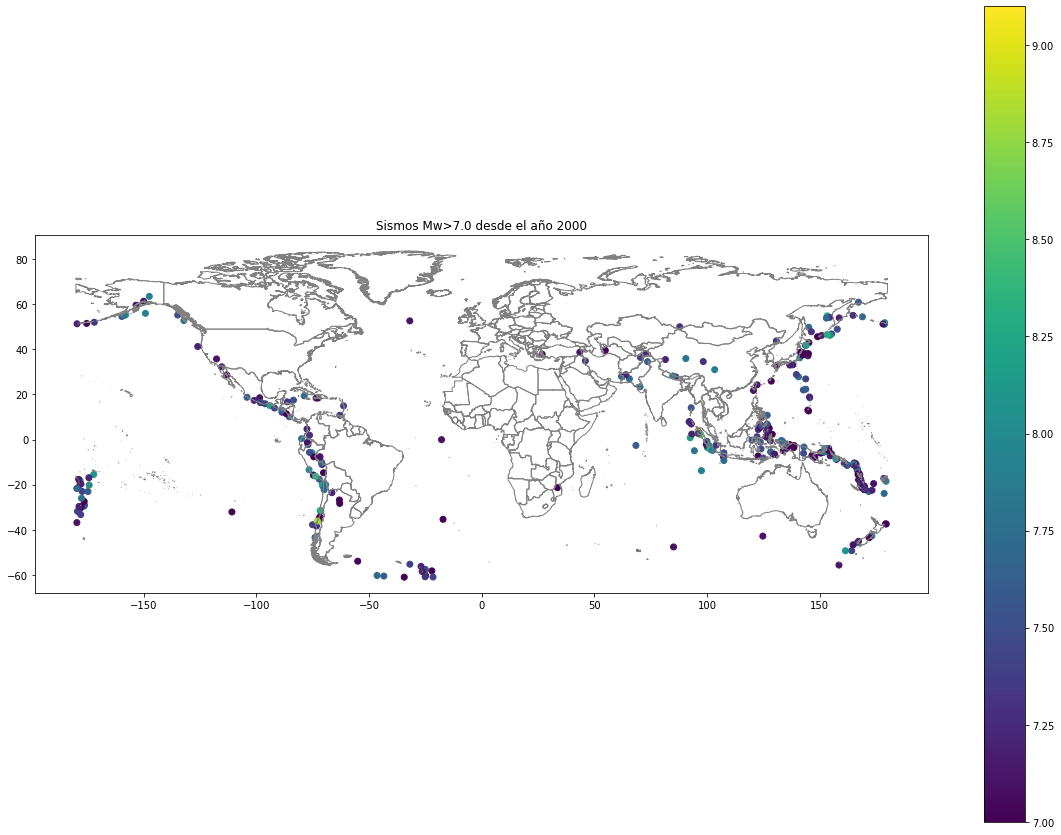

In [33]:
fig=plt.figure(figsize=(20,15))
ax=fig.add_subplot(111)

world.boundary.plot(ax=ax,color='gray',lw=1)
gdf.plot(ax=ax,column='properties.mag',legend=True)
ax.set_title('Sismos Mw>7.0 desde el año 2000');

## 3. Webscrapping

Suponga que ud. ha decidido crear un emprendimiento comercial vendiendo tablets, ya que actualmente que son un producto muy demandado para el teletrabajo. Para ello, necesita hacer un estudio de mercado y analizar los precios de venta de la competencia.

En este ejercicio, ud. hará un scrapper de la página de la tienda PCFactory, específicamente del catálogo de tablets ubicado en la siguiente URL: https://www.pcfactory.cl/tablets?categoria=967&papa=636.

**3.1** Analice cuidadosamente el código HTML de la página y determine: ¿qué tag o atributo permite identificar el listado de productos con sus respectivas características (nombre, marca, precio)?

      

**3.2** Obtenga el código web de la página y extraiga la información de interés, de manera de llegar a un DataFrame con la siguiente estructura:

<div>
<img src="attachment:imagen.png" width="500"/>
</div>


Note que existen dos páginas de resultados, el objetivo es extraer los datos de ambas páginas.

In [1]:
import requests, json
import pandas as pd
from bs4 import BeautifulSoup 

main_url = " https://www.pcfactory.cl/tablets?categoria=967&papa=636"

session = requests.Session()
response = session.get(main_url)

result = requests.get(main_url,cookies=session.cookies)
soup = BeautifulSoup(result.text, 'html.parser')
catalog= soup.find_all('input',attrs={"id": "data_mentalidad_web"})
catalog

[<input data-type="json" id="data_mentalidad_web" type="hidden" value='[{"name":"Tablet Space 7\" 1GB 16GB WiFi Quad Core Android","id":"43812","price":"46390","brand":"Gear","category":"Tablets","variant":"","list":"Categor\u00edas","position":2},{"name":"Tablet Space Kids 7\" 1GB 16GB WiFi Quad Core Android + Carcasa Monster","id":"43813","price":"51590","brand":"Gear","category":"Tablets","variant":"","list":"Categor\u00edas","position":4},{"name":"Tablet SoyMomo Lite 2.0 7\" 2GB 16GB Wifi Quad Core Android Rosado","id":"45068","price":"61890","brand":"SoyMomo","category":"Tablets","variant":"","list":"Categor\u00edas","position":6},{"name":"Tablet Tab M7 7\" HD 1GB 16GB 4G LTE Onix Black","id":"41836","price":"72190","brand":"Lenovo","category":"Tablets","variant":"","list":"Categor\u00edas","position":8},{"name":"Tablet M7 2 32GB 7\" HD Wifi Iron grey","id":"45200","price":"82490","brand":"Lenovo","category":"Tablets","variant":"","list":"Categor\u00edas","position":10},{"name":"T

In [2]:
session = requests.Session()
response = session.get(main_url)
print(session.cookies)

<RequestsCookieJar[<Cookie PHPSESSID=838seg0msb1jmagcsi4i9kqa0l for www.pcfactory.cl/>]>


In [5]:
products=catalog[0].attrs['value']

prods=json.loads(products)
prods

[{'name': 'Tablet Space 7" 1GB 16GB WiFi Quad Core Android',
  'id': '43812',
  'price': '46390',
  'brand': 'Gear',
  'category': 'Tablets',
  'variant': '',
  'list': 'Categorías',
  'position': 2},
 {'name': 'Tablet Space Kids 7" 1GB 16GB WiFi Quad Core Android + Carcasa Monster',
  'id': '43813',
  'price': '51590',
  'brand': 'Gear',
  'category': 'Tablets',
  'variant': '',
  'list': 'Categorías',
  'position': 4},
 {'name': 'Tablet SoyMomo Lite 2.0 7" 2GB 16GB Wifi Quad Core Android Rosado',
  'id': '45068',
  'price': '61890',
  'brand': 'SoyMomo',
  'category': 'Tablets',
  'variant': '',
  'list': 'Categorías',
  'position': 6},
 {'name': 'Tablet Tab M7 7" HD 1GB 16GB 4G LTE Onix Black',
  'id': '41836',
  'price': '72190',
  'brand': 'Lenovo',
  'category': 'Tablets',
  'variant': '',
  'list': 'Categorías',
  'position': 8},
 {'name': 'Tablet M7 2 32GB 7" HD Wifi Iron grey',
  'id': '45200',
  'price': '82490',
  'brand': 'Lenovo',
  'category': 'Tablets',
  'variant': '',


In [6]:
df=pd.DataFrame(columns=['name', 'id', 'price', 'brand','variant','list'])
for prod in prods:
    df=df.append({'name':prod['name'], 'id':prod['id'], 'price':prod['price'], 'brand':prod['brand'],'variant':prod['variant'],'list':prod['list']},ignore_index=True)

df.to_csv(¡'productos.csv')

,name,id,price,brand,variant,list
0,"Tablet Space 7"" 1GB 16GB WiFi Quad Core Android",43812,46390,Gear,,Categorías
1,"Tablet Space Kids 7"" 1GB 16GB WiFi Quad Core A...",43813,51590,Gear,,Categorías
2,"Tablet SoyMomo Lite 2.0 7"" 2GB 16GB Wifi Quad ...",45068,61890,SoyMomo,,Categorías
3,"Tablet Tab M7 7"" HD 1GB 16GB 4G LTE Onix Black",41836,72190,Lenovo,,Categorías
4,"Tablet M7 2 32GB 7"" HD Wifi Iron grey",45200,82490,Lenovo,,Categorías
5,"Tablet Tab M8 8"" 2GB 32GB WiFi Quad Core Andr...",36684,82490,Lenovo,,Categorías
6,"Kindle Touch 6"" 8GB Luz frontal ajustable WiFi...",44765,92790,Kindle,,Categorías
7,"Kindle Touch 6"" 8GB Luz frontal ajustable WiFi...",44767,92790,Kindle,,Categorías
8,"Tablet Tab M7 3rd Gen 7"" HD 2GB 32GB 4G LTE Ir...",43205,92790,Lenovo,,Categorías
9,"Kindle Touch 6"" 8GB Luz frontal ajustable WiFi...",40917,92790,Kindle,,Categorías
